In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import exp
from google.colab import files
from random import seed
from random import random

#upload of the dataset
uploaded = files.upload()

Saving Dataset1.csv to Dataset1.csv


In [ ]:
#Reading dataset
df = pd.read_csv('Dataset1.csv')


In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Preprocessing
df['Diabetes'] = df['Diabetes'].apply(lambda x: 1 if x in [1, 2] else 0)


# one-hot encoding Age categories
df = pd.get_dummies(df, columns=['Age'], drop_first=False, dtype=int)

# BMI and Health normalizations
standard = MinMaxScaler()
df['BMI'] = (df['BMI'] - min(df['BMI'])) / (max(df['BMI']) - min(df['BMI']))
df['MentHlth'] = standard.fit_transform(df[['MentHlth']])
df['PhysHlth'] = standard.fit_transform(df[['PhysHlth']])

# Features and targets
selected_features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'PhysHlth', 'DiffWalk', 'Sex'] + [col for col in df if col.startswith('Age')]
X = df[selected_features]
targets = ['Stroke', 'HeartDiseaseorAttack', 'Diabetes']
t = df[targets]
for target in targets:
    df[target] = df[target].astype(int)

#create a unique column with the targeted classes
y_L = []

for index, row in t.iterrows():
  if row['Stroke'] == 1:
    y_L.append(1)
  elif row['HeartDiseaseorAttack'] == 1:
    y_L.append(2)
  elif row['Diabetes'] == 1:
    y_L.append(3)
  else:
    y_L.append(0)

y = pd.DataFrame(y_L, columns=['target'])
print(y.value_counts())
print(X)
print(y)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y['target'], test_size=0.3, random_state=42)
# SMOTE before ONE--HOT
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())


#ONE-HOT
num_classes = 4
y_train_one_hot = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)



print(X_train_resampled.shape, y_train_resampled.shape)

print(y_train_one_hot[:5])
print(y_test_one_hot[:5])

target
0         193793
3          29639
2          19956
1          10292
Name: count, dtype: int64
        HighBP  HighChol       BMI  Smoker  PhysActivity  Fruits  Veggies  \
0            1         1  0.325581       1             0       0        1   
1            0         0  0.151163       1             1       0        0   
2            1         1  0.186047       0             0       1        0   
3            1         0  0.174419       0             1       1        1   
4            1         1  0.139535       0             1       1        1   
...        ...       ...       ...     ...           ...     ...      ...   
253675       1         1  0.383721       0             0       1        1   
253676       1         1  0.069767       0             0       0        0   
253677       0         0  0.186047       0             1       1        0   
253678       1         0  0.127907       0             0       1        1   
253679       1         1  0.151163       0          

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(X_train_resampled.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train_resampled, y_train_one_hot , epochs=150, batch_size=30)

Epoch 1/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.4251 - loss: 1.2256
Epoch 2/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.4586 - loss: 1.1867
Epoch 3/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.4605 - loss: 1.1819
Epoch 4/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.4624 - loss: 1.1791
Epoch 5/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4628 - loss: 1.1789
Epoch 6/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.4636 - loss: 1.1752
Epoch 7/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.4652 - loss: 1.1736
Epoch 8/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.4655 - loss: 1.1736
Epoch 9/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.4670 - loss: 1.1719
Epoch 10/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.4667 - loss: 1.1713
Epoch 11/150
18082/18082 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4667 -

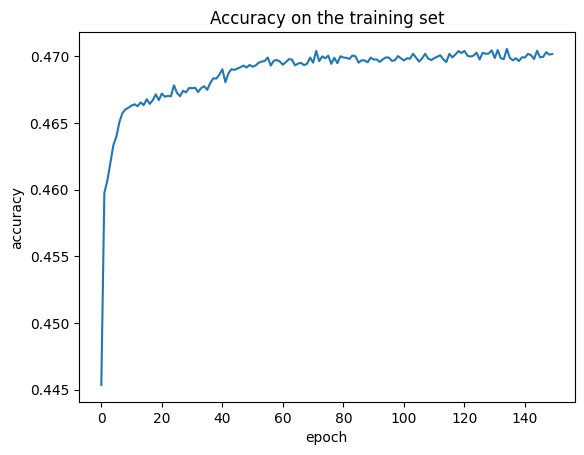

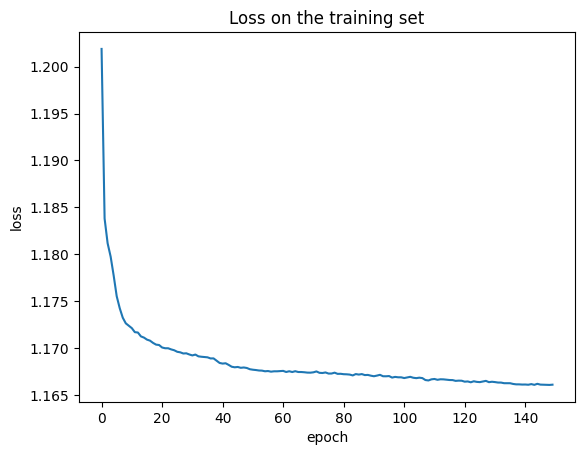

In [ ]:
# Plot the model's loss and accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the training set')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Loss on the training set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

2379/2379 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5895 - loss: 1.0076
Loss: 1.0096, Accuracy: 0.5878


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100: .2f}%')
print(classification_report(y_test, y_pred))

2379/2379 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy:  58.78%
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     58178
           1       0.12      0.34      0.18      3097
           2       0.20      0.37      0.26      5930
           3       0.24      0.41      0.30      8899

    accuracy                           0.59     76104
   macro avg       0.37      0.44      0.38     76104
weighted avg       0.75      0.59      0.65     76104

